# Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd 
import scipy as stats
#importing ML models from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis #LDA,QDA
import matplotlib.pyplot as plt
import seaborn as sns


import time
#Importing metrics functions from SK Learn
from sklearn.metrics import roc_auc_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #For encoding categorical variables

# Importing the data

In [2]:
data=pd.read_csv("C:\\Users\\Acer\\Desktop\\Advanced Analysis\\Data.csv")

# Deleting the Brand Variable

In [3]:
del(data["Brand"])

# Identifying the categorical variables 

In [4]:
Data_Categorical_Columns=['Country', 'Suggested Glassware','Suggested Serving Temperature', 'Sweet-Dry Scale', 'Body','Type of Wine']

# One Hot Encoding

In [5]:
for i in list(Data_Categorical_Columns):
    encoder=OneHotEncoder(sparse=False)
    data_encoded = pd.DataFrame (encoder.fit_transform(data[[i]]))
    data_encoded.columns = encoder.get_feature_names_out([i])
    data.drop([i] ,axis=1, inplace=True)
    data= pd.concat([data, data_encoded ], axis=1)

# Categorizing the prices

In [6]:
data["Price"]=[0 if i<=16.97 else 1 for i in data["Price"]]

# Checking the frequency of each class

In [12]:
len(data["Price"])

6469

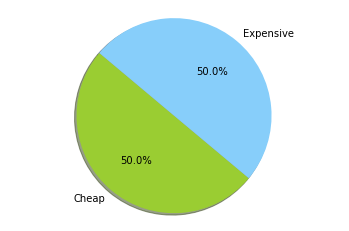

In [11]:
import matplotlib.pyplot as plt

# Data to plot
labels = ["Cheap","Expensive"]
sizes = [3236, 3233]
colors = ['yellowgreen',  'lightskyblue']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Seperating the independent and dependent variables

In [282]:
y=data["Price"]
x=data.drop("Price",axis=1)

# Fitting all the models

In [283]:
# models = [LogisticRegression(C=0.8,random_state=0,solver='lbfgs'),
#           DecisionTreeClassifier(max_depth=12,min_samples_split=8,random_state=1024),
#           svm.SVC(C = 0.8,kernel='linear'),
#           RandomForestClassifier(), 
#           LogisticRegression(solver='liblinear'),
#           LinearDiscriminantAnalysis(),
#           GradientBoostingClassifier(),
#           LGBMClassifier(num_leaves=31,
#                        max_depth=8, 
#                        learning_rate=0.02,
#                        n_estimators=250,
#                        subsample = 0.8,
#                        colsample_bytree =0.8
#                       ),
#           XGBClassifier(max_depth=12,
#                       n_estimators=250,
#                       min_child_weight=8, 
#                       subsample=0.8, 
#                       learning_rate =0.02,    
#                       seed=42),
#           QuadraticDiscriminantAnalysis(), 
#           GaussianNB(),
#           KNeighborsClassifier(),
#           CatBoostClassifier()
#          ]
# names = ["Logistic Regression with parameters",
#          "Decision Tree Classifier",
#          "Support Vector Machine",
#          "Random Forest",
#          "Logistic Regression",
#          "Linear Discriminant Analysis",
#          "Gradient Boosting",
#          "Light Gradient Boosting",
#          "X Gradient Boosting Classifier",
          
#           "Quadratic Discriminant Analysis",
#           "GaussianNB",
#           "KNN",
#           "CatBoost"]
# for model, name in zip(models, names):
#     print(name)
#     start = time.time()
#     for score in ["accuracy", "precision", "recall"]:
#         print(score," : ",cross_val_score(model, x, y ,scoring=score, cv=5).mean())
       
#     print('Time elapsed: ',time.time() - start)
#     print('\n')

# Splitting the train and test set

In [284]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Variable Importance Plot

In [285]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(15,15))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

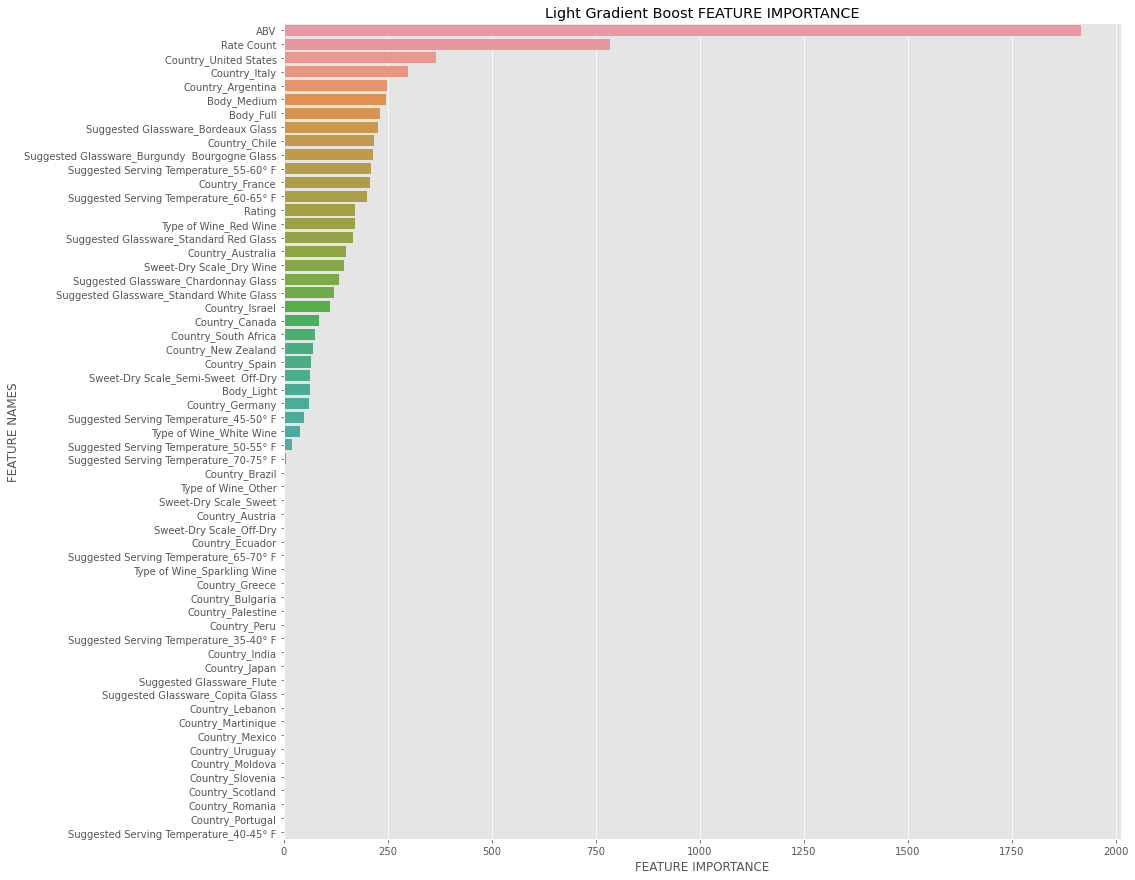

In [286]:
model=LGBMClassifier(num_leaves=31,
                       max_depth=8, 
                       learning_rate=0.02,
                       n_estimators=250,
                       subsample = 0.8,
                       colsample_bytree =0.8
                      )
model.fit(x_train,y_train)
plot_feature_importance(model.feature_importances_,x_train.columns,'Light Gradient Boost ')


# Selecting only the most important features

This code will be used to create a Data Frame of the variables (ordered according to its importance)

Text(0, 0.5, 'FEATURE NAMES')

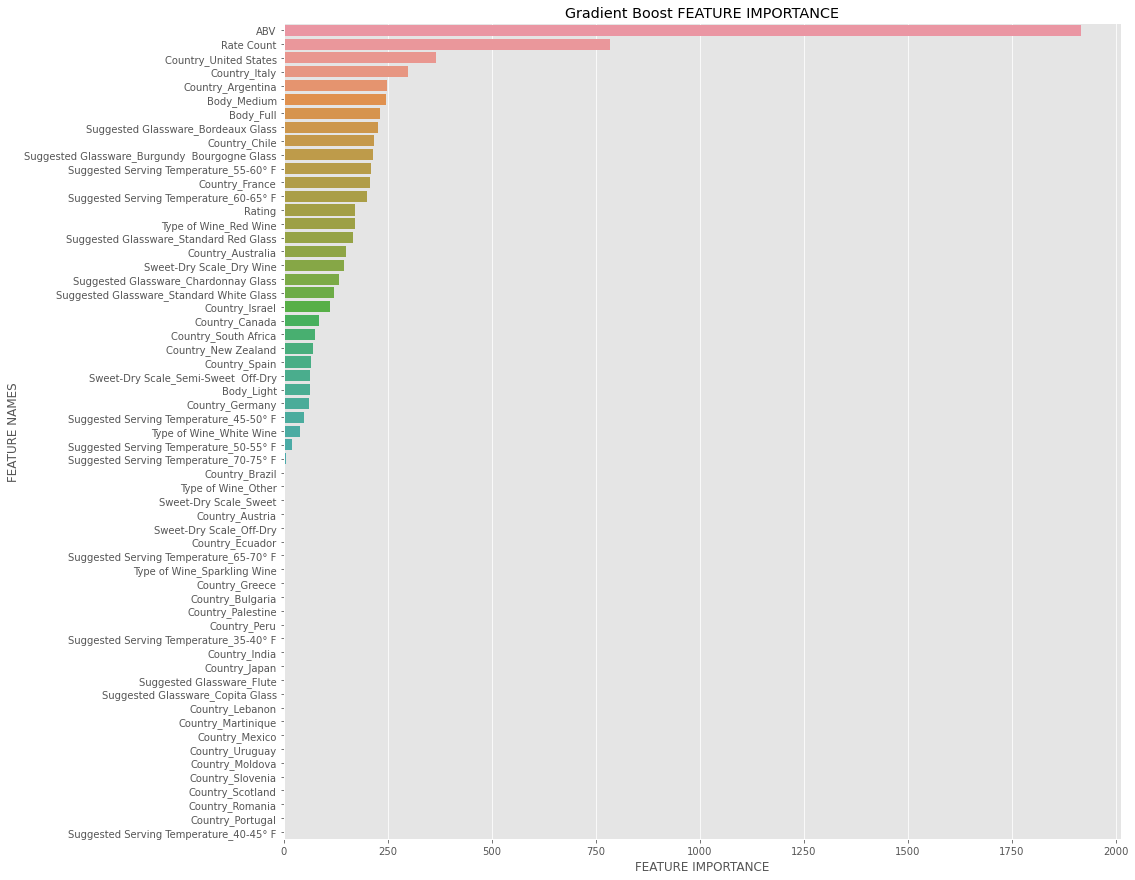

In [287]:
#Create arrays from feature importance and feature names
feature_importance = np.array(model.feature_importances_)
feature_names = np.array(x_train.columns)

#Create a DataFrame using a Dictionary
data2={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data2)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(15,15))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('Gradient Boost ' + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

This code will be used to create a list of the variables that our dataframe returned

In [288]:
list(fi_df["feature_names"])

['ABV',
 'Rate Count',
 'Country_United States',
 'Country_Italy',
 'Country_Argentina',
 'Body_Medium',
 'Body_Full',
 'Suggested Glassware_Bordeaux Glass',
 'Country_Chile',
 'Suggested Glassware_Burgundy  Bourgogne Glass',
 'Suggested Serving Temperature_55-60° F',
 'Country_France',
 'Suggested Serving Temperature_60-65° F',
 'Rating',
 'Type of Wine_Red Wine',
 'Suggested Glassware_Standard Red Glass',
 'Country_Australia',
 'Sweet-Dry Scale_Dry Wine',
 'Suggested Glassware_Chardonnay Glass',
 'Suggested Glassware_Standard White Glass',
 'Country_Israel',
 'Country_Canada',
 'Country_South Africa',
 'Country_New Zealand',
 'Country_Spain',
 'Sweet-Dry Scale_Semi-Sweet  Off-Dry',
 'Body_Light',
 'Country_Germany',
 'Suggested Serving Temperature_45-50° F',
 'Type of Wine_White Wine',
 'Suggested Serving Temperature_50-55° F',
 'Suggested Serving Temperature_70-75° F',
 'Country_Brazil',
 'Type of Wine_Other',
 'Sweet-Dry Scale_Sweet',
 'Country_Austria',
 'Sweet-Dry Scale_Off-Dry',

Now we will create a new list of just the most important variables

In [289]:
  Important_Variables=['ABV',
 'Rate Count',
 'Country_United States',
 'Country_Italy',
 'Country_Argentina',
 'Body_Medium',
 'Body_Full',
 'Suggested Glassware_Bordeaux Glass',
 'Country_Chile',
 'Suggested Glassware_Burgundy  Bourgogne Glass',
 'Suggested Serving Temperature_55-60° F',
 'Country_France',
 'Suggested Serving Temperature_60-65° F',
 'Rating',
 'Type of Wine_Red Wine',
 'Suggested Glassware_Standard Red Glass',
 'Country_Australia',
 'Sweet-Dry Scale_Dry Wine',
 'Suggested Glassware_Chardonnay Glass',
 'Suggested Glassware_Standard White Glass',
 'Country_Israel',
 'Country_Canada',
 'Country_South Africa',
 'Country_New Zealand',
 'Country_Spain',
 'Sweet-Dry Scale_Semi-Sweet  Off-Dry',
 'Body_Light',
 'Country_Germany',
 'Suggested Serving Temperature_45-50° F',
 'Type of Wine_White Wine',
 'Suggested Serving Temperature_50-55° F']

Now let us keep the most important variables and get rid of the rest from our train and test sets

In [290]:
for i in list(x_train.columns):
    if i in Important_Variables:
        continue
    else:
        del(x_train[i])
        
        
for i in list(x_test.columns):
    if i in Important_Variables:
        continue
    else:
        del(x_test[i])

Now let us keep the most important variavles and get rid of the rest from our original dataset

In [291]:
for i in list(x.columns):
    if i in Important_Variables:
        continue
    else:
        del(x[i])

# After removing the variables

# Fittting the model

In [292]:
# model=LGBMClassifier()
# model.fit(x_train,y_train)
# y_pred=model.predict(x_test)

# Getting the confusion matrix

In [293]:
# sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

# Getting the classification report

In [294]:
# report = classification_report(y_test, y_pred, output_dict=True)
# df = pd.DataFrame(report).transpose()
# sns.heatmap(df,annot=True,fmt="g")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

In [295]:
# report = classification_report(y_test, y_pred, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df

# Hyperparameter tuning with optuna

In [296]:
# from optuna.integration import LightGBMPruningCallback

# def objective(trial, X, y):
#     param_grid = {
#         # "device_type": trial.suggest_categorical("device_type", ['gpu']),
#         "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
#         "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
#         "max_depth": trial.suggest_int("max_depth", 3, 12),
#         "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
#         "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
#         "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
#         "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
#         "bagging_fraction": trial.suggest_float(
#             "bagging_fraction", 0.2, 0.95, step=0.1
#         ),
#         "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
#         "feature_fraction": trial.suggest_float(
#             "feature_fraction", 0.2, 0.95, step=0.1
#         ),
#     }

#     cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

#     cv_scores = np.empty(5)
#     for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
#         X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
#         y_train, y_test = y[train_idx], y[test_idx]

#         model = lgbm.LGBMClassifier(objective="binary", **param_grid)
#         model.fit(
#             X_train,
#             y_train,
#             eval_set=[(X_test, y_test)],
#             eval_metric="binary_logloss",
#             early_stopping_rounds=100,
#             callbacks=[
#                 LightGBMPruningCallback(trial, "binary_logloss")
#             ],  # Add a pruning callback
#         )
#         preds = model.predict_proba(X_test)
#         cv_scores[idx] = log_loss(y_test, preds)

#     return np.mean(cv_scores)

In [297]:
# study = optuna.create_study(direction="minimize", study_name="LGBM Classifier")
# func = lambda trial: objective(trial, x, y)
# study.optimize(func, n_trials=200)

In [298]:
# print(f"\tBest value (rmse): {study.best_value:.5f}")
# print(f"\tBest params:")

# for key, value in study.best_params.items():
#     print(f"\t\t{key}: {value}")

In [299]:
# from optuna.visualization.matplotlib import plot_optimization_history

# plot_optimization_history(study);

In [300]:
# from optuna.visualization.matplotlib import plot_param_importances

# plot_param_importances(study);

# Using the graph to tune the best hyperparameters

In [301]:
# from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# from sklearn.model_selection import KFold

In [302]:
# A=list(range(40,70,1))

In [303]:
# params = {} #initialize parameters
# params['min_data_in_leaf'] = A
# params['bagging_fraction'] = [0.8,1,1.2]
# print(params, iterations)

In [304]:
# model=LGBMClassifier()
# cv=KFold(n_splits=5,shuffle=True)
# gsearch = GridSearchCV(model, params,cv=cv)
# results = gsearch.fit(x_train, y_train)
# results.best_params_

# Test Scores of the best model

In [305]:
# model=LGBMClassifier(min_data_in_leaf= 65)
# model.fit(x_train,y_train)
# y_pred=model.predict(x_test)
# sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

In [306]:
# report = classification_report(y_test, y_pred, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df

# Train Score for the best model

In [307]:
# model=LGBMClassifier(min_data_in_leaf= 65)
# model.fit(x_train,y_train)
# y_pred=model.predict(x_train)
# sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt="g")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

In [308]:
# report = classification_report(y_train, y_pred, output_dict=True)
# df = pd.DataFrame(report).transpose()
# df

# PDP Plots

Let us first rename our columns to make it shorter

In [309]:
# x.columns=['Rate Count',
#  'ABV',
#  'Rating',
#  'Argentina',
#  'Australia',
#  'Canada',
#  'Chile',
#  'France',
#  'Germany',
#  'Israel',
#  'Italy',
#  'New Zealand',
#  'South Africa',
#  'Spain',
#  'United States',
#  'Bordeaux Glass',
#  'Burgundy Glass',
#  'Chardonnay Glass',
#  'Red Glass',
#  'White Glass',
#  '45-50° F',
#  '50-55° F',
#  '55-60° F',
#  '60-65° F',
#  'Dry Wine',
#  'Off-Dry',
#  'Full',
#  'Light',
#  'Medium',
#  'Red Wine',
#  'White Wine']

In [310]:
# from sklearn.inspection import PartialDependenceDisplay

# clf = LGBMClassifier(min_data_in_leaf= 65).fit(x, y)
# features = [0,1,2]
# PartialDependenceDisplay.from_estimator(clf, x, features)

In [311]:
# features = [3,4,5]
# PartialDependenceDisplay.from_estimator(clf, x, features)

In [312]:
# features = [6,7,8]
# PartialDependenceDisplay.from_estimator(clf, x, features)

In [313]:
# features = [9,10,11]
# PartialDependenceDisplay.from_estimator(clf, x, features)

In [314]:
# features = [12,13,14]
# PartialDependenceDisplay.from_estimator(clf, x, features)

In [315]:
# features = [15,16,17]
# PartialDependenceDisplay.from_estimator(clf, x, features)

In [316]:
# features = [18,19,20]
# PartialDependenceDisplay.from_estimator(clf, x, features)

In [317]:
# features = [21,22,23]
# PartialDependenceDisplay.from_estimator(clf, x, features)

In [318]:
# features = [24,25,26]
# PartialDependenceDisplay.from_estimator(clf, x, features)

In [319]:
# features = [27,28,29]
# PartialDependenceDisplay.from_estimator(clf, x, features)

In [320]:
# features = [30]
# PartialDependenceDisplay.from_estimator(clf, x, features)

# PCA

# Multiple Correspondence Analysis with Country

In [268]:
data=pd.read_csv("C:\\Users\\Acer\\Desktop\\Advanced Analysis\\Data.csv")

In [273]:
x=data[Data_Categorical_Columns]

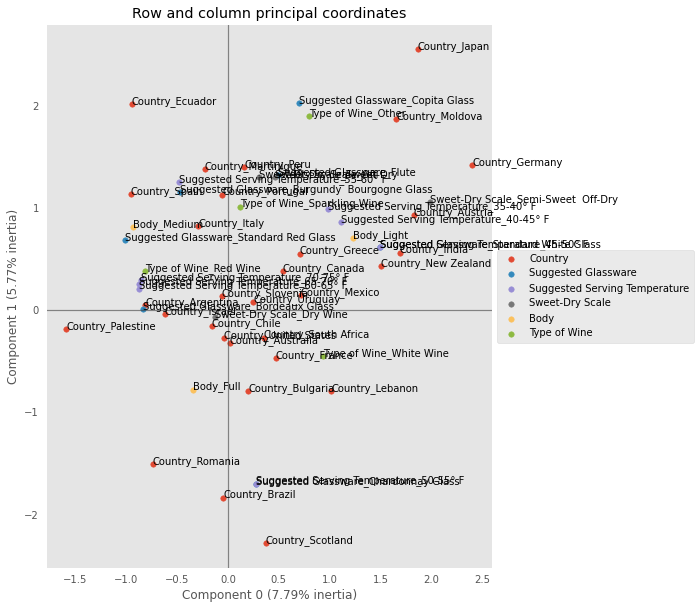

In [274]:
import prince
mca = prince.MCA(
        n_components=2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42
        )
churn_mca = mca.fit(x)
ax = churn_mca.plot_coordinates(
        X=x,
        ax=None,
        figsize=(8, 10),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=30,
        show_column_labels=True,
        legend_n_cols=1
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [337]:
churn_mca.U_

array([[-0.01265711,  0.00635925],
       [-0.01265711,  0.00635925],
       [-0.01054305, -0.00023063],
       ...,
       [ 0.017361  ,  0.00738194],
       [ 0.017361  ,  0.00738194],
       [ 0.01484489,  0.01805607]])

In [ ]:
wha